Data Sample:
   student_id  enrollment_status   GPA  attendance_rate  \
0           1                  1  3.40             67.4   
1           2                  1  3.07             81.7   
2           3                  1  2.62             94.9   
3           4                  1  3.63             89.3   
4           5                  0  3.37             92.3   

   standardized_test_score program_interest ethnicity  family_income  
0                     76.0         Business     White        43575.0  
1                     74.0      Engineering  Hispanic        59648.0  
2                     51.3         Business     Asian        54558.0  
3                     67.1             Arts     Other        89175.0  
4                     69.0             Arts     Black        63200.0  
Model Evaluation:
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.07      0.11        29
           1       0.71      0.92      0

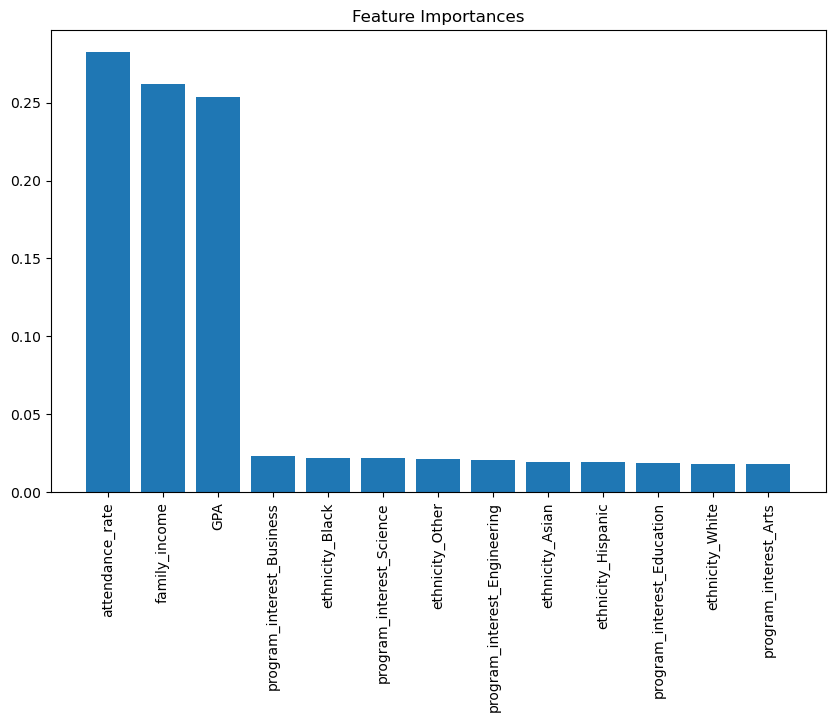

Model predictions saved to 'model_predictions.csv'


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Data
# Load datasets
enrollment_data = pd.read_csv("historical_enrollment.csv")
academic_data = pd.read_csv("academic_records.csv")
demographic_data = pd.read_csv("demographic_data.csv")

# Merge datasets on a common identifier (e.g., student_id)
data = pd.merge(enrollment_data, academic_data, on="student_id")
data = pd.merge(data, demographic_data, on="student_id")

# Display the first few rows of the combined data
print("Data Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Define target and features
X = data.drop(['enrollment_status', 'student_id'], axis=1)  # Features
y = data['enrollment_status']  # Target variable

# Define categorical and numerical features
categorical_features = ['program_interest', 'ethnicity']
numerical_features = ['GPA', 'attendance_rate', 'family_income']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Create a pipeline with preprocessing and a RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Feature Importance Analysis
# Extract feature names after preprocessing
# Get feature importances from the Random Forest model
model_rf = model.named_steps['classifier']

# One-hot encoding generates new columns, so get the final feature names from the preprocessor
feature_names = (numerical_features +
                 list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))

# Calculate feature importances
importances = model_rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = np.array(feature_names)[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.show()



# Step 7: Communicate Results
# Save model predictions and feature importances as a report or output file
output = X_test.copy()
output['Predicted Enrollment'] = y_pred
output.to_csv("model_predictions.csv", index=False)

print("Model predictions saved to 'model_predictions.csv'")
